In [1]:
from waterworld.waterworld import env as custom_waterworld
from potential_field.potential_field_policy import PotentialFieldPolicy
from test_policy import get_configs
from utils import get_frames

from pettingzoo.utils import average_total_reward

from multiprocessing import Pool, cpu_count

import tqdm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json
import glob
import os

pygame 2.0.0 (SDL 2.0.12, python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Test results

In [2]:
test_main = []
for file in glob.glob("test_results/potential_field/test_main/*.json"):
    with open(file) as f:
        test_main.append(json.load(f))
test_main = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"], 
        "n_sensors":config["env_config"]["n_sensors"],
        "angle": (
            ("rand" if config["potential_field_config"]["randomize_angle"] else "na") 
            if "randomize_angle" in config["potential_field_config"] 
            else config["potential_field_config"]["spin_angle"]),
        "rewards": config["rewards"]
    }
    for config in test_main])
test_main["rewards_mean"] = test_main.rewards.apply(lambda x: np.mean(x))
test_main["rewards_min"] = test_main.rewards.apply(lambda x: np.min(x))
test_main["rewards_max"] = test_main.rewards.apply(lambda x: np.max(x))
test_main["rewards_std"] = test_main.rewards.apply(lambda x: np.std(x))
test_main = test_main.explode('rewards')
test_main["rewards"] = test_main["rewards"].astype(float)

## by sensor

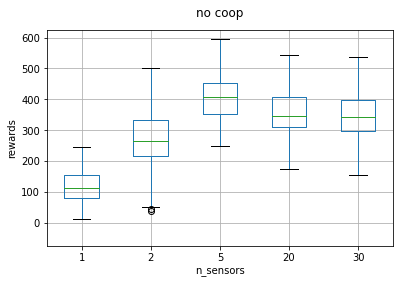

In [39]:
ax = test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 1)].boxplot("rewards", by="n_sensors")
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-75, 625))
fig = ax.get_figure()
fig.suptitle("no coop")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_sensor/no_coop.png")

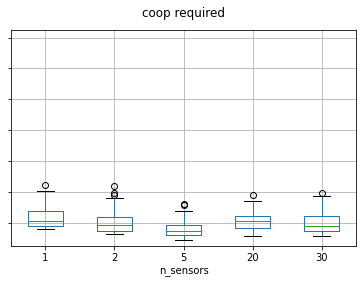

In [40]:
ax = test_main[(test_main["angle"] == "na") & (test_main["n_coop"] == 2)].boxplot("rewards", by="n_sensors")
ax.set_title("")
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-75, 625))
fig = ax.get_figure()
fig.suptitle("coop required")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_sensor/coop.png")

## by angle

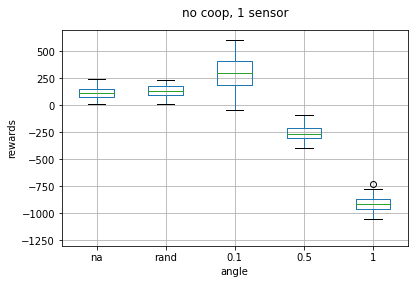

In [43]:
ax = test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 1 sensor")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/1_sensor/no_coop.png")

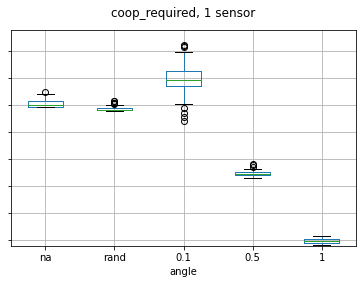

In [44]:
ax = test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop_required, 1 sensor")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/1_sensor/coop.png")

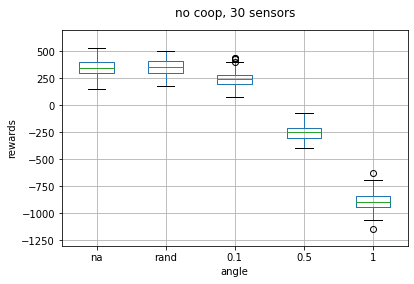

In [45]:
ax = test_main[(test_main["n_sensors"] == 30) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 30 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/30_sensor/no_coop.png")

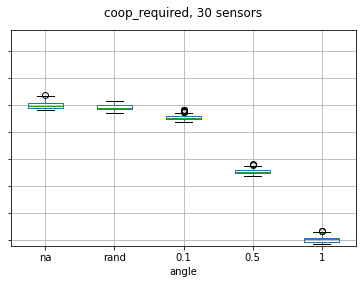

In [46]:
ax = test_main[(test_main["n_sensors"] == 30) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop_required, 30 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/30_sensor/coop.png")

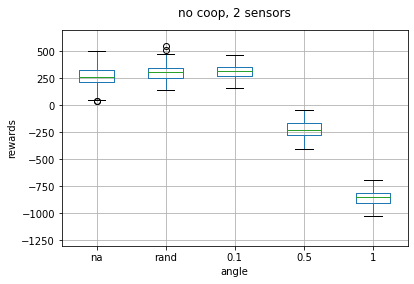

In [47]:
ax = test_main[(test_main["n_sensors"] == 2) & (test_main["n_coop"] == 1) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("no coop, 2 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/2_sensor/no_coop.png")

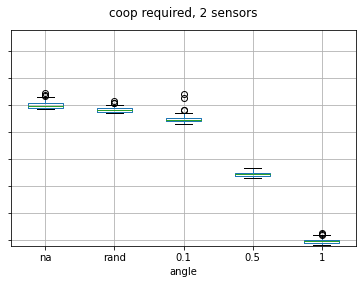

In [48]:
ax = test_main[(test_main["n_sensors"] == 2) & (test_main["n_coop"] == 2) & (test_main["angle"] != 0)].boxplot("rewards", by="angle", positions=[2, 3, 4, 0, 1])
ax.set_title("")
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([]) 
ax.set_ylim((-1300, 700))
fig = ax.get_figure()
fig.suptitle("coop required, 2 sensors")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_angle/2_sensor/coop.png")

## weights

In [14]:
test_weights = []
for file in glob.glob("test_results/potential_field/weight/*.json"):
    with open(file) as f:
        test_weights.append(json.load(f))
test_weights = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"], 
        "n_sensors":config["env_config"]["n_sensors"],
        "obs_weight": config["potential_field_config"]["obs_weight"],
        "poison_weight": config["potential_field_config"]["poison_weight"],
        "barrier_weight": config["potential_field_config"]["barrier_weight"],
        "food_weight": config["potential_field_config"]["food_weight"],
        "rewards": config["rewards"]
    }
    for config in test_weights])
test_weights["rewards_mean"] = test_weights.rewards.apply(lambda x: np.mean(x))
test_weights["rewards_min"] = test_weights.rewards.apply(lambda x: np.min(x))
test_weights["rewards_max"] = test_weights.rewards.apply(lambda x: np.max(x))
test_weights["rewards_std"] = test_weights.rewards.apply(lambda x: np.std(x))
test_weights = test_weights.explode('rewards')
test_weights["rewards"] = test_weights["rewards"].astype(float)

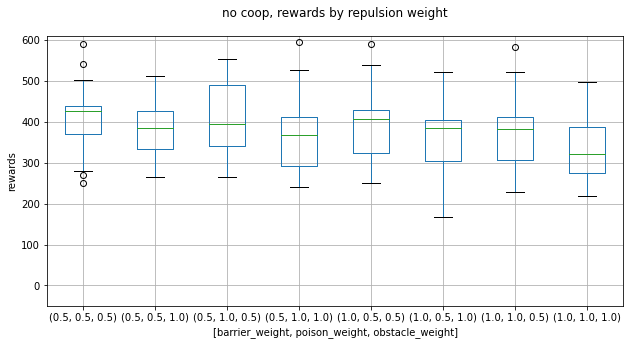

In [49]:
ax = test_weights[(test_weights["n_coop"] == 1) & (test_weights["food_weight"] == 1)].boxplot("rewards", figsize=(10, 5), by=["barrier_weight","poison_weight","obs_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
ax.set_xlabel("[barrier_weight, poison_weight, obstacle_weight]")
fig = ax.get_figure()
fig.suptitle("no coop, rewards by repulsion weight")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_repulsion_weight/no_coop.png")

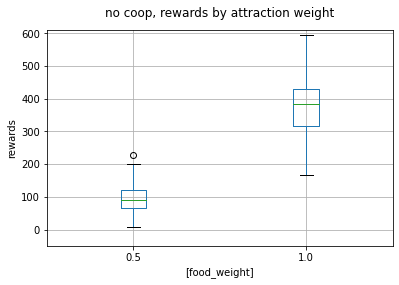

In [51]:
ax = test_weights[(test_weights["n_coop"] == 1)].boxplot("rewards", by=["food_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("no coop, rewards by attraction weight")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_attraction_weight/no_coop.png")

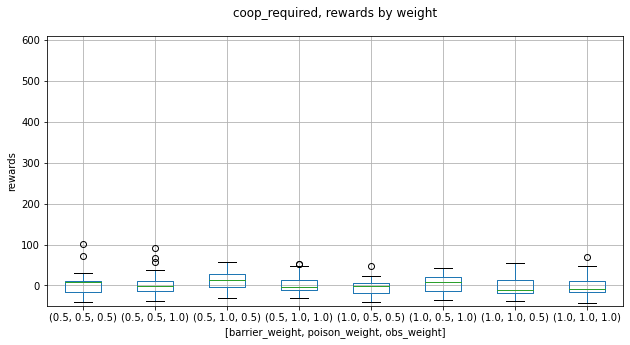

In [50]:
ax = test_weights[(test_weights["n_coop"] == 2) & (test_weights["food_weight"] == 1)].boxplot("rewards", figsize=(10, 5), by=["barrier_weight","poison_weight","obs_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("coop_required, rewards by weight")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_repulsion_weight/coop.png")

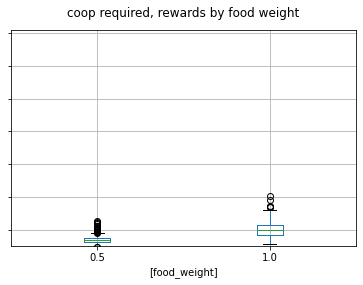

In [52]:
ax = test_weights[(test_weights["n_coop"] == 2)].boxplot("rewards", by=["food_weight",])
ax.set_title("")
ax.set_ylim((-50, 610))
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([]) 
fig = ax.get_figure()
fig.suptitle("coop required, rewards by food weight")
plt.show()
fig.savefig("test_results/graphs/potential_field/by_attraction_weight/coop.png")

## random results

In [19]:
test_random = []
for file in glob.glob("test_results/potential_field/test_random/*.json"):
    with open(file) as f:
        test_random.append(json.load(f))
test_random = pd.DataFrame([
    {
        "n_coop": config["env_config"]["n_coop"],
        "rewards": config["rewards"]
    }
    for config in test_random])
test_random = test_random.explode('rewards')
test_random["rewards"] = test_random["rewards"].astype(float)

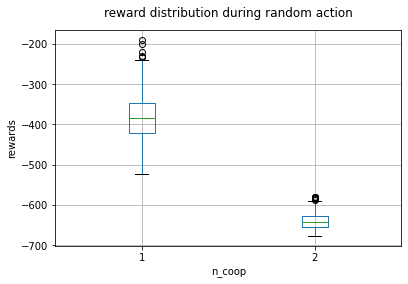

In [53]:
ax = test_random.boxplot("rewards", by="n_coop")
ax.set_title("")
ax.set_ylabel("rewards")
fig = ax.get_figure()
fig.suptitle("reward distribution during random action")
plt.show()
fig.savefig("test_results/graphs/random_action.png")

## rl

In [21]:
rl_results = []
rl_results_names = glob.glob("test_results/ddpg/*/*/results.txt")
for result_txt in rl_results_names:
    rl_results.append(pd.read_csv(result_txt, header=None).values.flatten())

In [22]:
rl_results_names

['test_results/ddpg/APEX_DDPG_custom_waterworld1_nocoop_657ce_00000_0_2022-03-31_09-34-14/checkpoint_000420/results.txt',
 'test_results/ddpg/APEX_DDPG_custom_waterworld_1_80d21_00000_0_2022-03-28_11-18-45/checkpoint_000870/results.txt',
 'test_results/ddpg/APEX_DDPG_custom_waterworld_1_80d21_00000_0_2022-03-28_11-18-45/checkpoint_001580/results.txt']

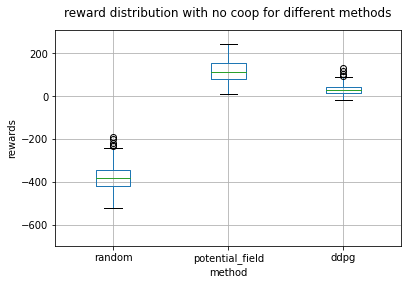

In [54]:
compare_df = pd.concat([
    pd.DataFrame({"rewards": test_random[test_random["n_coop"] == 1].rewards.values, "strategy":"random"}),
    pd.DataFrame({
        "rewards": test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 1) & (test_main["angle"] == "na")].rewards.values, 
        "strategy": "potential_field"}),
    pd.DataFrame({"rewards": rl_results[0], "strategy": "ddpg"}), 
])
compare_df["rewards"] = compare_df["rewards"].astype(float)
ax = compare_df.boxplot(by="strategy", positions=[2, 1, 0])
ax.set_title("")
ax.set_ylabel("rewards")
ax.set_ylim((-700, 310))
ax.set_xlabel("method")
fig = ax.get_figure()
fig.suptitle("reward distribution with no coop for different methods")
plt.show()
fig.savefig("test_results/graphs/ddpg/no_coop.png")

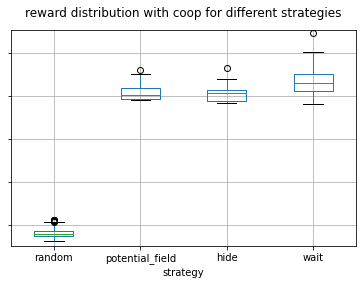

In [55]:
compare_df = pd.concat([
    pd.DataFrame({"rewards": test_random[test_random["n_coop"] == 2].rewards.values, "strategy":"random"}),
    pd.DataFrame({
        "rewards": test_main[(test_main["n_sensors"] == 1) & (test_main["n_coop"] == 2) & (test_main["angle"] == "na")].rewards.values, 
        "strategy": "potential_field"}),
    pd.DataFrame({"rewards": rl_results[1], "strategy": "wait"}), 
    pd.DataFrame({"rewards": rl_results[2], "strategy": "hide"})
])
compare_df["rewards"] = compare_df["rewards"].astype(float)
ax = compare_df.boxplot(by="strategy", positions=[2, 1, 0, 3])
ax.set_title("")
# ax.set_ylabel("rewards")
ax.set_ylabel("")
ax.yaxis.set_ticklabels([])
ax.set_ylim((-700, 310))
ax.set_xlabel("strategy")
fig = ax.get_figure()
fig.suptitle("reward distribution with coop for different strategies")
plt.show()
fig.savefig("test_results/graphs/ddpg/coop.png")